<a href="https://colab.research.google.com/github/nadilaaaaaa/StoreSalesAnalysis/blob/main/Store_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [68]:
df_sales = pd.read_csv('/content/stores_sales_forecasting.csv', encoding='latin1')
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Memahami Kualitas Data

###### a. Cek kolom

In [69]:
df_sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

###### b. Tipe data tiap kolom

In [70]:
df_sales.dtypes

,0
Row ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


###### c. Mengidentifikasi missing values

In [71]:
df_sales.isna().sum(axis=0)

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


###### d. Mengecek duplikat pada data

In [72]:
df_sales.duplicated().sum()

np.int64(0)

###### e. Mengetahui nilai unik tiap kolom

In [73]:
df_sales.nunique(axis=0)

,0
Row ID,2121
Order ID,1764
Order Date,889
Ship Date,960
Ship Mode,4
Customer ID,707
Customer Name,707
Segment,3
Country,1
City,371


###### f. Ubah format data pada kolom tanggal

In [74]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Ship Date']=pd.to_datetime(df_sales['Ship Date'])
display(df_sales.dtypes)

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


### Transformasi Data

In [75]:
df_sales['Profit_Status'] = np.where(df_sales['Profit']>0, 'Menguntungkan (Positif)', 'Merugi (Negatif)')
df_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Menguntungkan (Positif)
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Menguntungkan (Positif)
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Merugi (Negatif)
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,Menguntungkan (Positif)
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,Menguntungkan (Positif)


### Statistika Deskriptif

In [76]:
df_sales.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,2121.0,5041.643564,1.0,2568.0,5145.0,7534.0,9991.0,2885.740258
Order Date,2121,2016-04-30 03:54:13.748231680,2014-01-06 00:00:00,2015-05-26 00:00:00,2016-06-20 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,2121,2016-05-04 01:54:44.299858432,2014-01-10 00:00:00,2015-05-31 00:00:00,2016-06-23 00:00:00,2017-05-18 00:00:00,2018-01-05 00:00:00,NaN
Postal Code,2121.0,55726.556341,1040.0,22801.0,60505.0,90032.0,99301.0,32261.888225
Sales,2121.0,349.834887,1.892,47.04,182.22,435.168,4416.174,503.179145
Quantity,2121.0,3.785007,1.0,2.0,3.0,5.0,14.0,2.25162
Discount,2121.0,0.173923,0.0,0.0,0.2,0.3,0.7,0.181547
Profit,2121.0,8.699327,-1862.3124,-12.849,7.7748,33.7266,1013.127,136.049246


### 1. Total penjualan

In [77]:
total_sales = df_sales.Sales.sum()
print(f'total_sales = {total_sales}')

total_sales = 741999.7953


### 2. Total keuntungan

In [78]:
total_profit = df_sales.Profit.sum()
print(f'total_profit = {total_profit}')

total_profit = 18451.272800000006


### 3. Tranksasi Merugi vs Menguntungkan

###### Jumlah penjualan yang menguntungkan vs merugi

In [79]:
df_sales.Profit_Status.value_counts()

,count
Profit_Status,
Menguntungkan (Positif),1374
Merugi (Negatif),747


###### Proporsi untung vs rugi

In [80]:
df_sales.Profit_Status.value_counts(normalize=True)

,proportion
Profit_Status,
Menguntungkan (Positif),0.647808
Merugi (Negatif),0.352192


### 4. Tiga cabang toko teratas untuk kota yang memiliki profit terbesar

###### a. Profit tiap kota

In [81]:
profit_kota = df_sales.groupby('City')['Profit'].sum()
profit_kota

,Profit
City,
Akron,-72.0996
Alexandria,104.4522
Allen,-31.3722
Allentown,3.3488
Amarillo,-507.7095
...,...
Wilson,20.3920
Woodstock,-12.0784
Woonsocket,20.1248


###### b. Top 3 kota yang memiliki profit tertinggi

In [82]:
top_city = profit_kota.sort_values(ascending=False).head(3)
top_city

,Profit
City,
Seattle,6208.8182
New York City,5306.6915
Detroit,3332.6748


###### c. Tiga kota yang memiliki profit terendah

In [83]:
low_city = profit_kota.sort_values(ascending=True).head(3)
low_city

,Profit
City,
Philadelphia,-6827.1254
Chicago,-3516.4663
Houston,-3404.8030


### 5. Total Penjualan Tiap Bulan

##### a. Agregasi kolom order date dan sales

In [84]:
df_sales['Month'] = df_sales['Order Date'].dt.strftime('%Y-%m')
sales_per_month = df_sales.groupby('Month')['Sales'].sum().reset_index()
sales_per_month

,Month,Sales
0,2014-01,6242.5250
1,2014-02,1839.6580
2,2014-03,14573.9560
3,2014-04,7944.8370
4,2014-05,6912.7870
5,2014-06,13206.1256
6,2014-07,10821.0510
7,2014-08,7320.3465
8,2014-09,23816.4808
9,2014-10,12304.2470


###### b. Bulan dengan penjualan tertinggi

In [85]:
max_month = sales_per_month.sort_values(by='Sales', ascending=False).head(3)
max_month

,Month,Sales
46,2017-11,37056.7150
35,2016-12,36678.7150
34,2016-11,31783.6288


### 6. Produk yang paling banyak terjual

In [86]:
top_product = df_sales.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(5)
top_product

,Quantity
Product Name,
KI Adjustable-Height Table,74
"Situations Contoured Folding Chairs, 4/Set",64
Staple-based wall hangings,62
Eldon Wave Desk Accessories,61
Chromcraft Round Conference Tables,61


### 7. Mode pengiriman yang sering dipilih untuk mengirim barang

In [87]:
df_sales['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,1248
Second Class,427
First Class,327
Same Day,119


### 8. Tren Keuntungan Tiap Bulan

In [88]:
profit_per_month = df_sales.groupby('Month')['Profit'].sum().reset_index()
profit_per_month

,Month,Profit
0,2014-01,805.4665
1,2014-02,120.6917
2,2014-03,-1128.6550
3,2014-04,554.3801
4,2014-05,-349.8776
5,2014-06,596.3153
6,2014-07,374.2467
7,2014-08,663.4717
8,2014-09,1858.5976
9,2014-10,249.1645


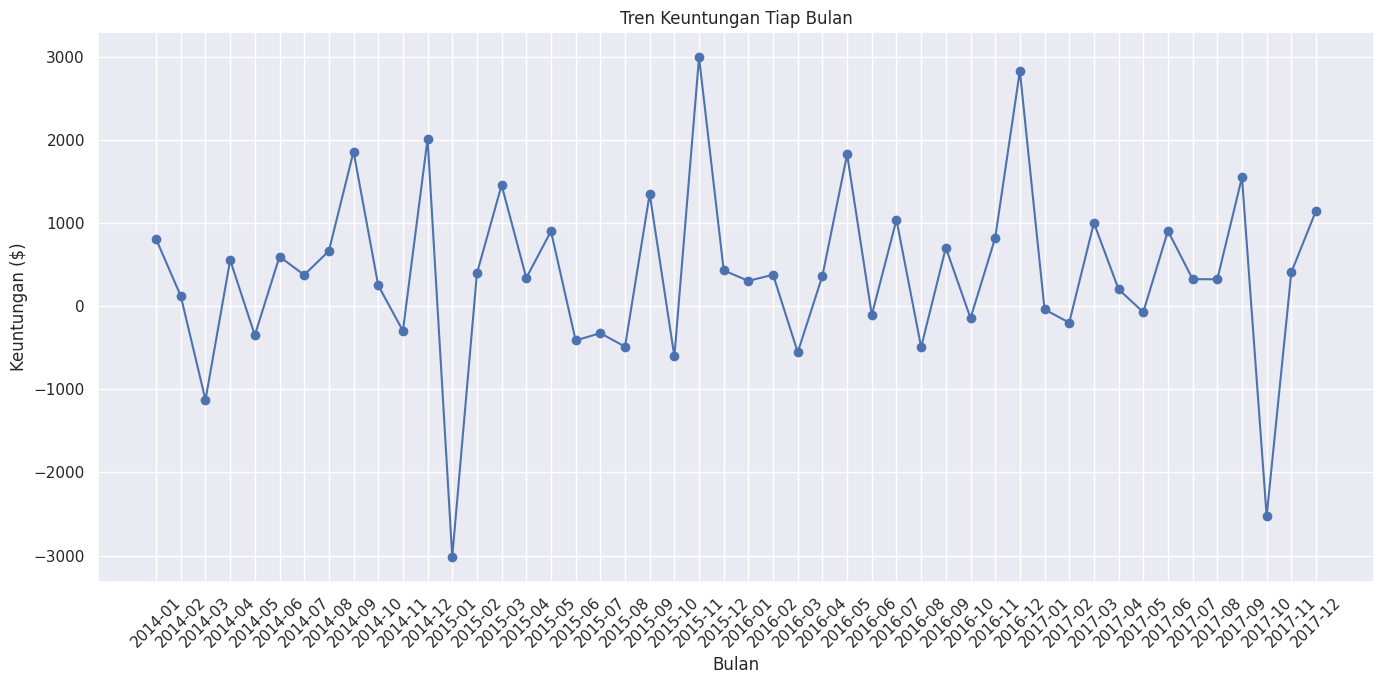

In [89]:
plt.figure(figsize=(14, 7))
plt.plot(profit_per_month['Month'], profit_per_month['Profit'], marker='o', linestyle='-')
plt.title('Tren Keuntungan Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Keuntungan ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. Tren Penjualan Tiap Bulan

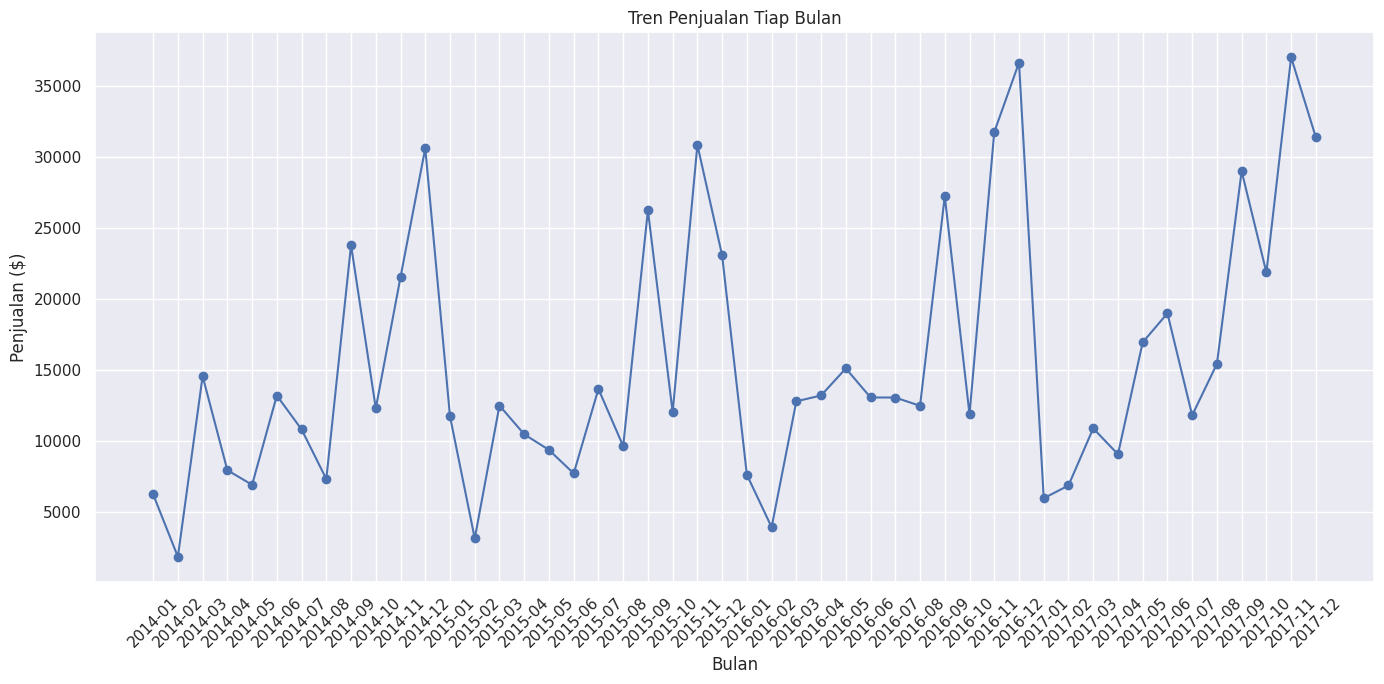

In [90]:
plt.figure(figsize=(14, 7))
plt.plot(sales_per_month['Month'], sales_per_month['Sales'], marker='o', linestyle='-')
plt.title('Tren Penjualan Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 10. Banyak Unit yang Terjual Untuk Tiap Sub Kategori

In [91]:
unit = df_sales.groupby('Sub-Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
unit

,Sub-Category,Quantity
2,Furnishings,3563
1,Chairs,2356
3,Tables,1241
0,Bookcases,868


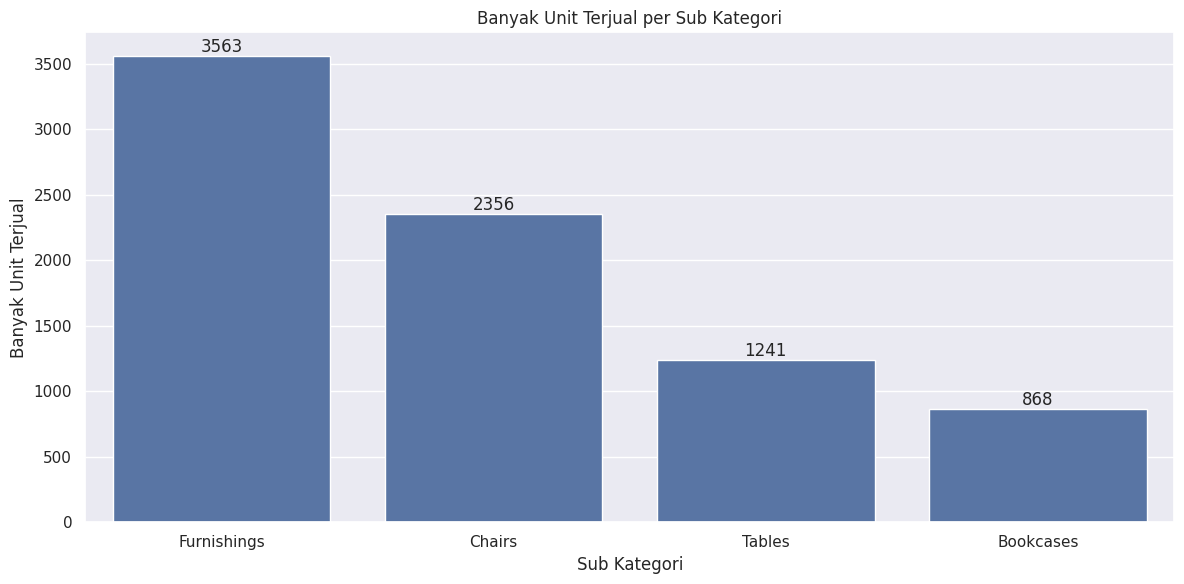

In [92]:
plt.figure(figsize=(12, 6))
histo = sns.barplot(x='Sub-Category', y='Quantity', data=unit)
plt.title('Banyak Unit Terjual per Sub Kategori')
plt.xlabel('Sub Kategori')
plt.ylabel('Banyak Unit Terjual')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
for container in histo.containers:
    histo.bar_label(container, fmt='%d')
plt.show()